<a href="https://colab.research.google.com/github/mocha-1/Fuzzy/blob/main/ISR%2BSegment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU
* Broswer != Firefox (cannot upload images in step 2)

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install q tensorflow==2.4.1
!pip install q keras==2.4.3

     |████████████████████████████████| 394.3 MB 14 kB/s 
     |████████████████████████████████| 14.8 MB 34.4 MB/s 
     |████████████████████████████████| 462 kB 38.6 MB/s 
     |████████████████████████████████| 3.8 MB 33.6 MB/s 
     |████████████████████████████████| 2.9 MB 22.9 MB/s 
     |████████████████████████████████| 132 kB 45.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=a25fc018e13a9b548bb344c24f3f49dbc143c41bfe9a3537055b8d9a5352bf8b
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting

  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [3]:
! pip install git+https://github.com/mocha-1/image-segmentation-keras


  Cloning https://github.com/mocha-1/image-segmentation-keras to /tmp/pip-req-build-cd0f0ad2
  Running command git clone -q https://github.com/mocha-1/image-segmentation-keras /tmp/pip-req-build-cd0f0ad2
     |████████████████████████████████| 3.3 MB 5.6 MB/s 
     |████████████████████████████████| 948 kB 45.8 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=34569 sha256=8987f5371104d4ce2920109255a5f2277d0c436051cee731cf20bca68354b9fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-busg6_nm/wheels/21/16/0e/d9eecffdcf308d880af2a24ab814368397b0dae3f49bacd8d3
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver do

In [4]:
# Clone realESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

# Clone BSRGAN
!git clone https://github.com/cszn/BSRGAN.git

!rm -r SwinIR
# Clone SwinIR
!git clone https://github.com/JingyunLiang/SwinIR.git
!pip install timm

# Download the pre-trained models
!wget https://github.com/cszn/KAIR/releases/download/v1.0/BSRGAN.pth -P BSRGAN/model_zoo
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 671, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 671 (delta 1), reused 5 (delta 1), pack-reused 665
Receiving objects: 100% (671/671), 5.02 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (356/356), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 5.2 MB/s 
     |████████████████████████████████| 5.8 MB 29.7 MB/s 
     |████████████████████████████████| 190 kB 32.3 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194484 sha256=5a253d6ddb73b172a97fe81f4795a2848b7e0b00f2b5124296f68e0b9708752b
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 177 kB 10.5 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl siz

# 2. Upload Images

Upload the images to be processed by SwinIR

In [5]:
import os
import glob
from google.colab import files
import shutil
print(' Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.\n Note2: You may need Chrome to enable file uploading!\n Note3: If out-of-memory, set test_patch_wise = True.\n')

# test SwinIR by partioning the image into patches
test_patch_wise = False

# to be compatible with BSRGAN
!rm -r BSRGAN/testsets/RealSRSet
upload_folder = 'BSRGAN/testsets/RealSRSet'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

filenames = ''

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  filenames = str(filename[:-4])
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

 Note1: You can find an image on the web or download images from the RealSRSet (proposed in BSRGAN, ICCV2021) at https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/RealSRSet+5images.zip.
 Note2: You may need Chrome to enable file uploading!
 Note3: If out-of-memory, set test_patch_wise = True.



Saving blur1.png to blur1.png
move blur1.png to BSRGAN/testsets/RealSRSet/blur1.png


In [6]:
filename_origin = ''
uploaded = files.upload()
for filename in uploaded.keys():
  filename_origin = str(filename[:-4])
  dst_path = os.path.join(filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving original1.png to original1.png
move original1.png to original1.png


In [7]:
filename_black = ''
uploaded = files.upload()
for filename in uploaded.keys():
  filename_black = str(filename[:-4])
  dst_path = os.path.join(filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving black1.png to black1.png
move black1.png to black1.png


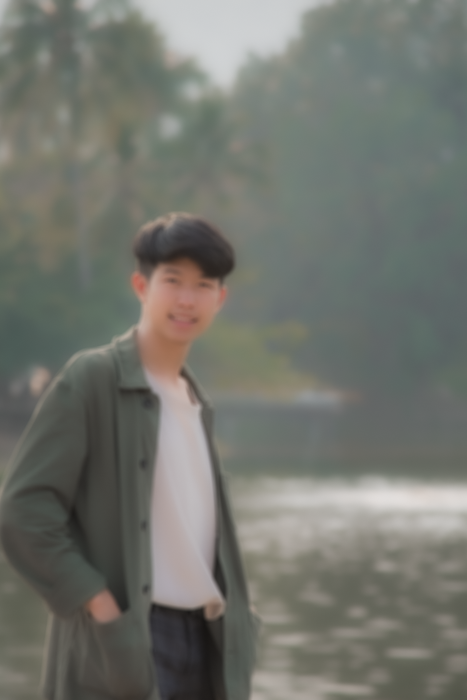

In [8]:
from IPython.display import Image
Image(f'BSRGAN/testsets/RealSRSet/{filenames}.png')

# 3. Inference


In [9]:
# BSRGAN
# !rm -r results
if not test_patch_wise:
  %cd BSRGAN
  !python main_test_bsrgan.py
  %cd ..
  shutil.move('BSRGAN/testsets/RealSRSet_results_x4', 'results/BSRGAN')

# realESRGAN
# if test_patch_wise:
#   !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input BSRGAN/testsets/RealSRSet --netscale 4 --output results/realESRGAN --tile 800
# else:
#   !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input BSRGAN/testsets/RealSRSet --netscale 4 --output results/realESRGAN

# SwinIR
if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --tile 800
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4
shutil.move('results/swinir_real_sr_x4', 'results/SwinIR')

# SwinIR-Large
# if test_patch_wise:
#   !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model --tile 640
# else:
#   !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFOWMFC_s64w8_SwinIR-L_x4_GAN.pth --folder_lq BSRGAN/testsets/RealSRSet --scale 4 --large_model
# shutil.move('results/swinir_real_sr_x4_large', 'results/SwinIR_large')
for path in sorted(glob.glob(os.path.join('results/SwinIR_large', '*.png'))):
  os.rename(path, path.replace('SwinIR.png', 'SwinIR_large.png')) # here is a bug in Colab file downloading: no same-name files

/content/Real-ESRGAN/BSRGAN
LogHandlers setup!
22-05-12 10:24:01.651 :       Model Name : BSRGAN
22-05-12 10:24:01.654 :           GPU ID : 0
[3, 3, 64, 23, 32, 4]
22-05-12 10:24:14.100 :       Input Path : testsets/RealSRSet
22-05-12 10:24:14.100 :      Output Path : testsets/RealSRSet_results_x4
22-05-12 10:24:14.100 : ---1 --> BSRGAN --> x4--> blur1.png
libpng warning: iCCP: known incorrect sRGB profile
/content/Real-ESRGAN
loading model from experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
libpng warning: iCCP: known incorrect sRGB profile
Testing 0 blur1               


# 4. Visualization

In [10]:
# # utils for visualization
# import cv2
# import matplotlib.pyplot as plt
# def display(img1, img2):
#   total_figs = 5
#   fig = plt.figure(figsize=(total_figs*12, 14))
#   ax1 = fig.add_subplot(1, total_figs, 1) 
#   plt.title('Input image', fontsize=30)
#   ax1.axis('off')
#   ax2 = fig.add_subplot(1, total_figs, 2)
#   plt.title('BSRGAN (ICCV2021) output', fontsize=30)
#   ax2.axis('off')
#   ax3 = fig.add_subplot(1, total_figs, 3)
#   plt.title('Real-ESRGAN output', fontsize=30)
#   ax3.axis('off')
#   ax4 = fig.add_subplot(1, total_figs, 4)
#   plt.title('SwinIR (ours) output', fontsize=30)
#   ax4.axis('off')
#   ax5 = fig.add_subplot(1, total_figs, 5)
#   plt.title('SwinIR-Large (ours) output', fontsize=30)
#   ax5.axis('off')
#   ax1.imshow(img1)
#   ax2.imshow(img2['BSRGAN'])
#   ax3.imshow(img2['realESRGAN'])
#   ax4.imshow(img2['SwinIR'])
#   ax5.imshow(img2['SwinIR-L'])

# def imread(img_path):
#   img = cv2.imread(img_path)
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   return img

# # display each image in the upload folder
# print('Note: BSRGAN may be better at face restoration, but worse at building restoration because it uses different datasets in training.')
# if test_patch_wise:
#   print('BSRGAN does not support "test_patch_wise" mode for now. Set test_patch_wise = False to see its results.\n')
# else:
#   print('\n')
# input_folder = upload_folder
# result_folder = 'results/SwinIR'
# input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
# output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
# for input_path, output_path in zip(input_list, output_list):
#   img_input = imread(input_path)
#   img_output = {}
#   img_output['SwinIR'] = imread(output_path)
#   img_output['SwinIR-L'] = imread(output_path.replace('SwinIR/', 'SwinIR_large/').replace('SwinIR.png', 'SwinIR_large.png'))
#   if test_patch_wise:
#     img_output['BSRGAN'] = img_output['SwinIR']*0+255
#   else:
#     img_output['BSRGAN'] = imread(output_path.replace('SwinIR', 'BSRGAN'))
#   path = output_path.replace('/SwinIR/', '/realESRGAN/').replace('_SwinIR.png','_out{}'.format(os.path.splitext(input_path)[1]))
#   if os.path.exists(path):
#     shutil.move(path, path.replace('_out.', '_realESRGAN.'))
#   img_output['realESRGAN'] = imread(path.replace('_out.', '_realESRGAN.'))

#   display(img_input, img_output)

# 5. Download Results


In [11]:
from keras_segmentation.models.model_utils import transfer_weights
from keras_segmentation.pretrained import pspnet_101_voc12
from keras_segmentation.models.pspnet import pspnet_101

pretrained_model = pspnet_101_voc12()
print(pretrained_model.output_width,pretrained_model.output_height)

264151040/264149344 [==============================] - 5s 0us/step
473 473


In [12]:
# filenames = 'DSC_6341-2'
# print(filenames)
# print(filenames[:-4])

In [13]:
import cv2
from google.colab.patches import cv2_imshow
origin = cv2.imread(f'/content/Real-ESRGAN/results/BSRGAN/{filenames}_BSRGAN.png',1)
origin2 = cv2.imread(f'/content/Real-ESRGAN/results/SwinIR/{filenames}_SwinIR.png',1)
print(origin2.shape)

o = pretrained_model.predict_segmentation(
    inp=f"/content/Real-ESRGAN/results/BSRGAN/{filenames}_BSRGAN.png",
    out_fname=f"/tmp/out_{filenames}_BSRGAN1.png", overlay_img=True, show_legends=True, prediction_width=origin.shape[1], prediction_height=origin.shape[0],
    class_names = [ "" ,"aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car" , "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "potted plant", "sheep", "sofa", "train", "tv/monitor"]

)
# print(pretrained_model.output_width,pretrained_model.output_height)
out = pretrained_model.predict_segmentation(
    inp=f"/content/Real-ESRGAN/results/BSRGAN/{filenames}_BSRGAN.png",
    out_fname=f"/tmp/out_{filenames}_BSRGAN2.png"

)

(2800, 1868, 3)


In [14]:
o = pretrained_model.predict_segmentation(
    inp=f"/content/Real-ESRGAN/results/SwinIR/{filenames}_SwinIR.png",
    out_fname=f"/tmp/out_{filenames}_SwinIR1.png", overlay_img=True, show_legends=True, prediction_width=origin2.shape[1], prediction_height=origin2.shape[0],
    class_names = [ "" ,"aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car" , "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "potted plant", "sheep", "sofa", "train", "tv/monitor"]

)
# print(pretrained_model.output_width,pretrained_model.output_height)
out = pretrained_model.predict_segmentation(
    inp=f"/content/Real-ESRGAN/results/SwinIR/{filenames}_SwinIR.png",
    out_fname=f"/tmp/out_{filenames}_SwinIR2.png"

)

In [15]:
from IPython.display import Image
Image(f'/tmp/out_{filenames}.png')

In [16]:
from IPython.display import Image
Image(f'/tmp/out_{filenames}_BSRGAN.png')

In [17]:
# print(pretrained_model.evaluate_segmentation( inp_images_dir="/content/drive/MyDrive/Fuzzy/original_test"  , annotations_dir="/content/drive/MyDrive/Fuzzy/annotation_test" ) )

(2800, 1868, 3)
(2800, 1868, 4)


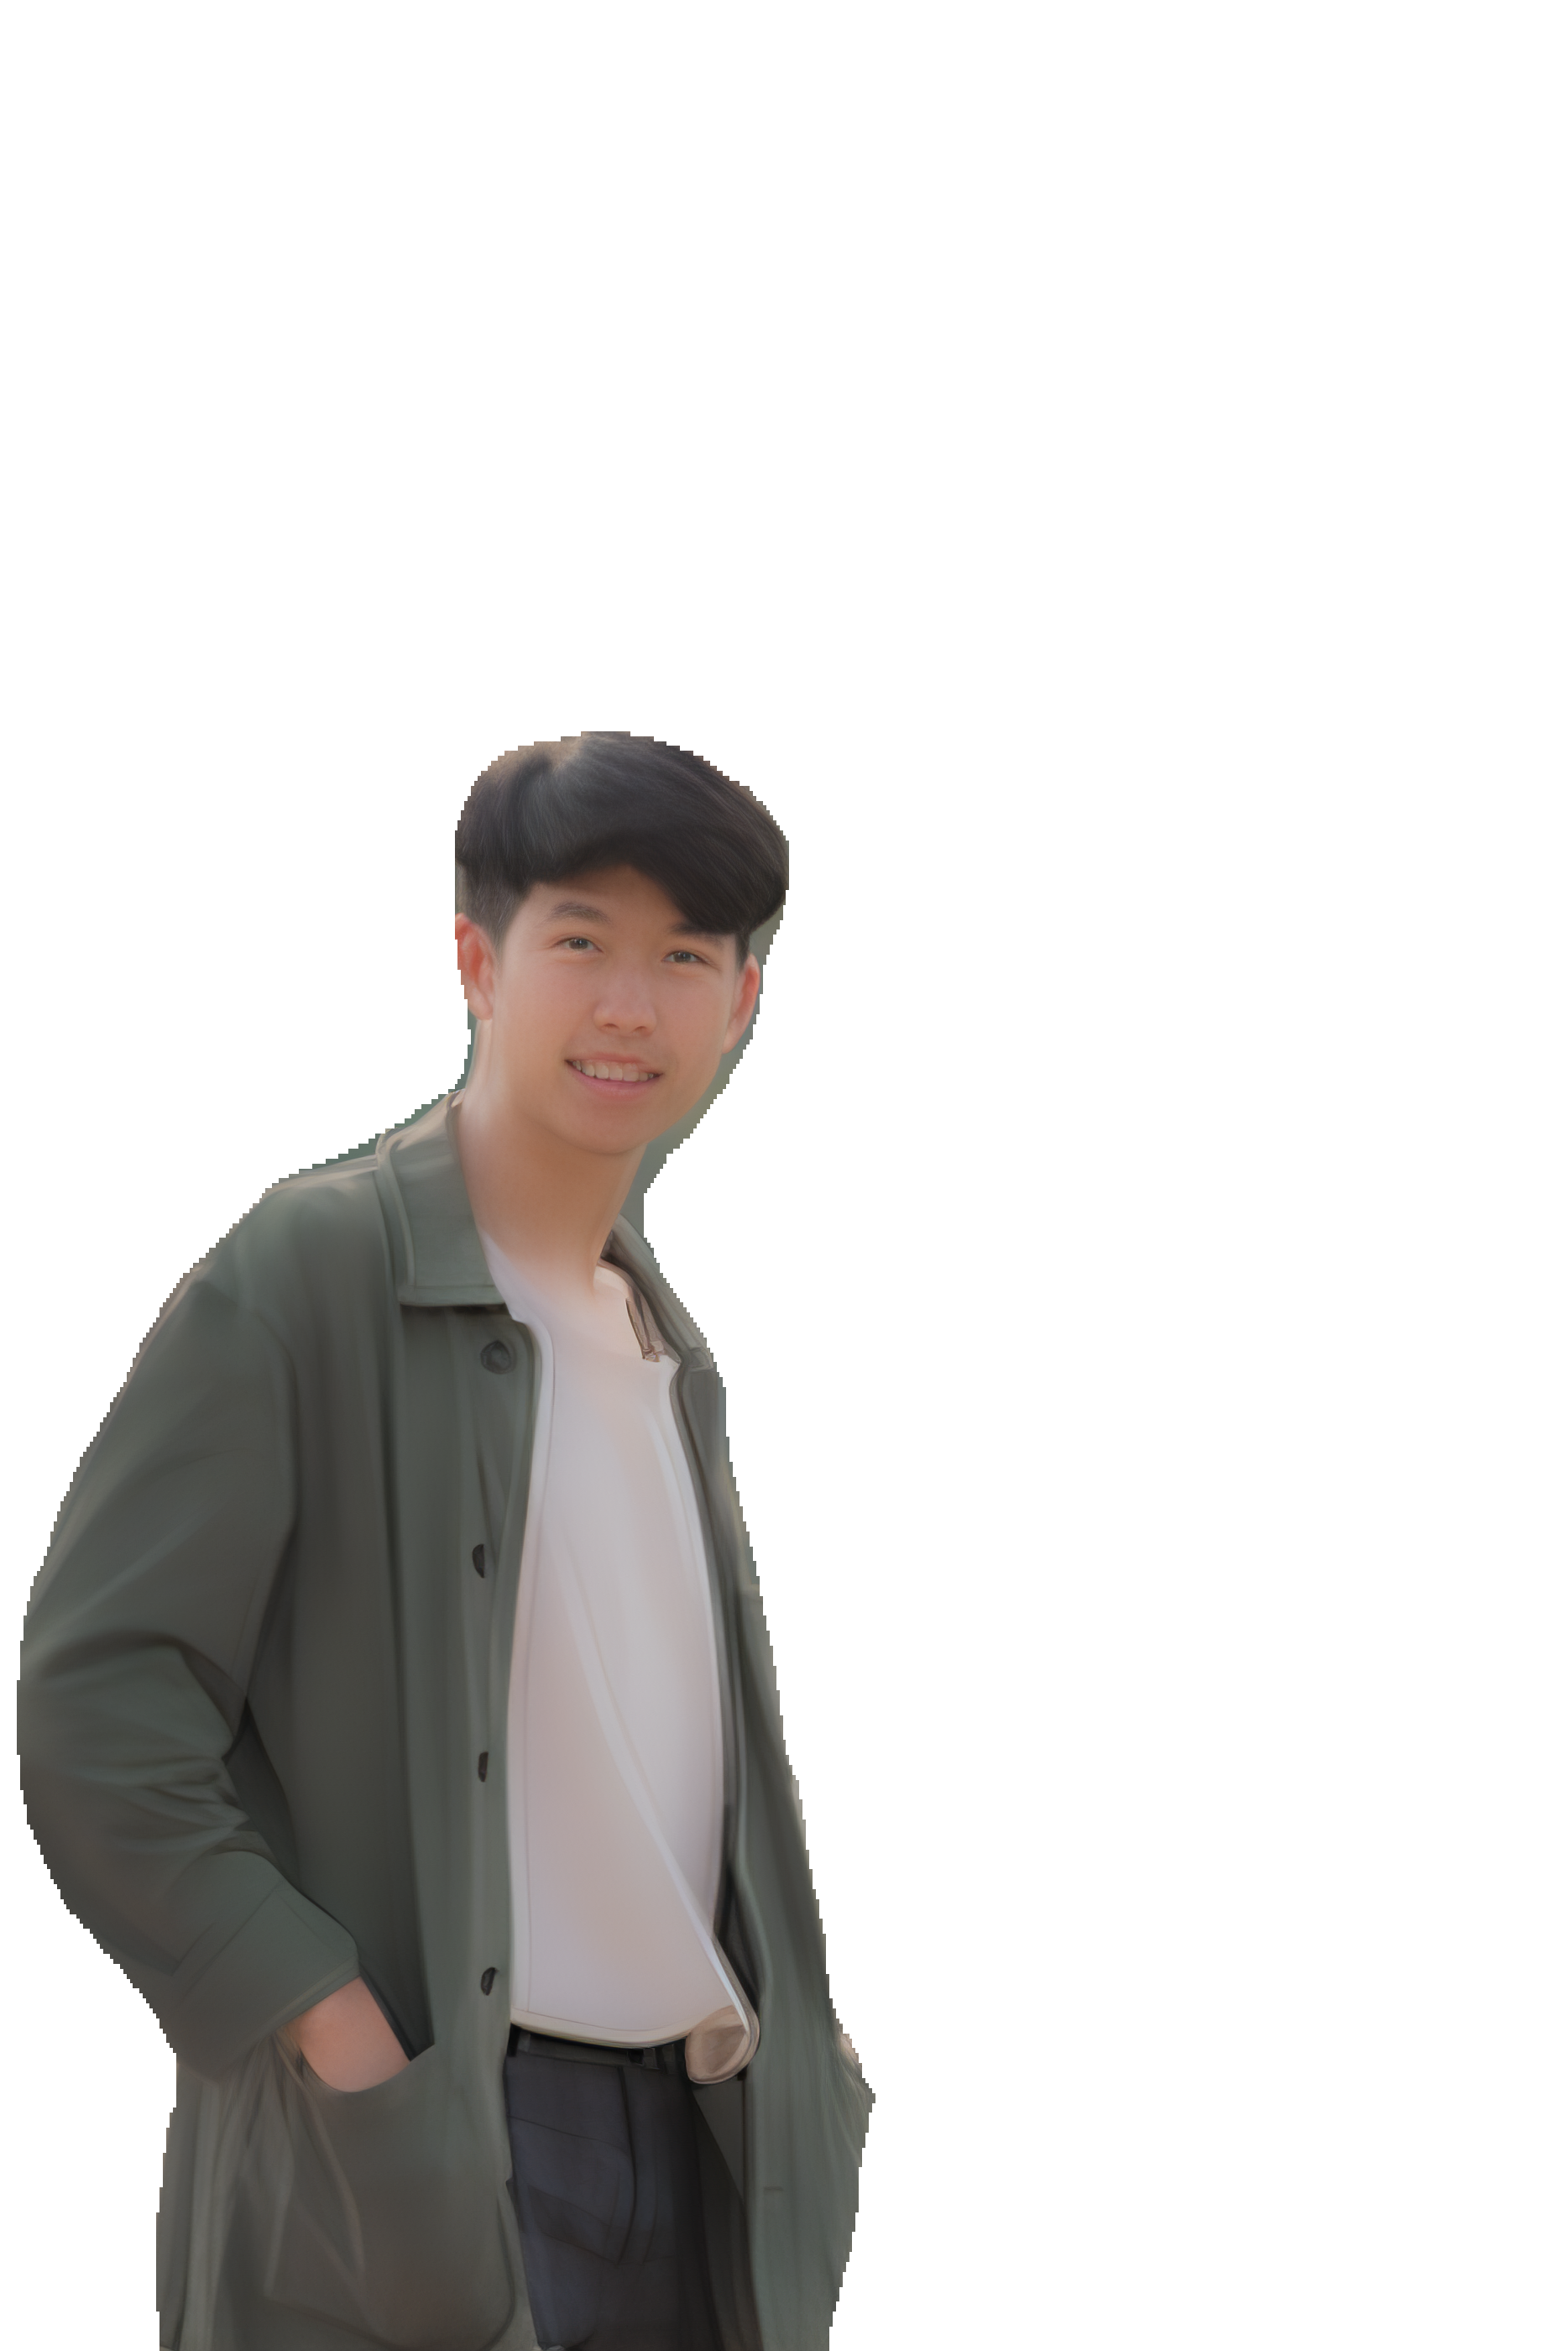

True

In [18]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


out_crop = cv2.imread(f'/content/Real-ESRGAN/results/BSRGAN/{filenames}_BSRGAN.png',1)

print(out_crop.shape)
oo = cv2.imread(f"/tmp/out_{filenames}_BSRGAN2.png",1)
out_shape = cv2.resize(oo, (out_crop.shape[1],out_crop.shape[0]), interpolation=cv2.INTER_LINEAR)

transparent_img = np.zeros((out_crop.shape[0],out_crop.shape[1], 4), dtype=np.uint8)

print(transparent_img.shape)

for i in range(out_shape.shape[0]):
  for j in range(out_shape.shape[1]):
    if(out_shape[i,j,0] != 197):
      transparent_img[i,j,0] = out_crop[i,j,0]
      transparent_img[i,j,1] = out_crop[i,j,1]
      transparent_img[i,j,2] = out_crop[i,j,2]
      transparent_img[i,j,3] = 255

cv2_imshow(transparent_img)
cv2.imwrite('/tmp/dicut_img_BSRGAN.png', transparent_img)

(2800, 1868, 3)
(2800, 1868, 4)


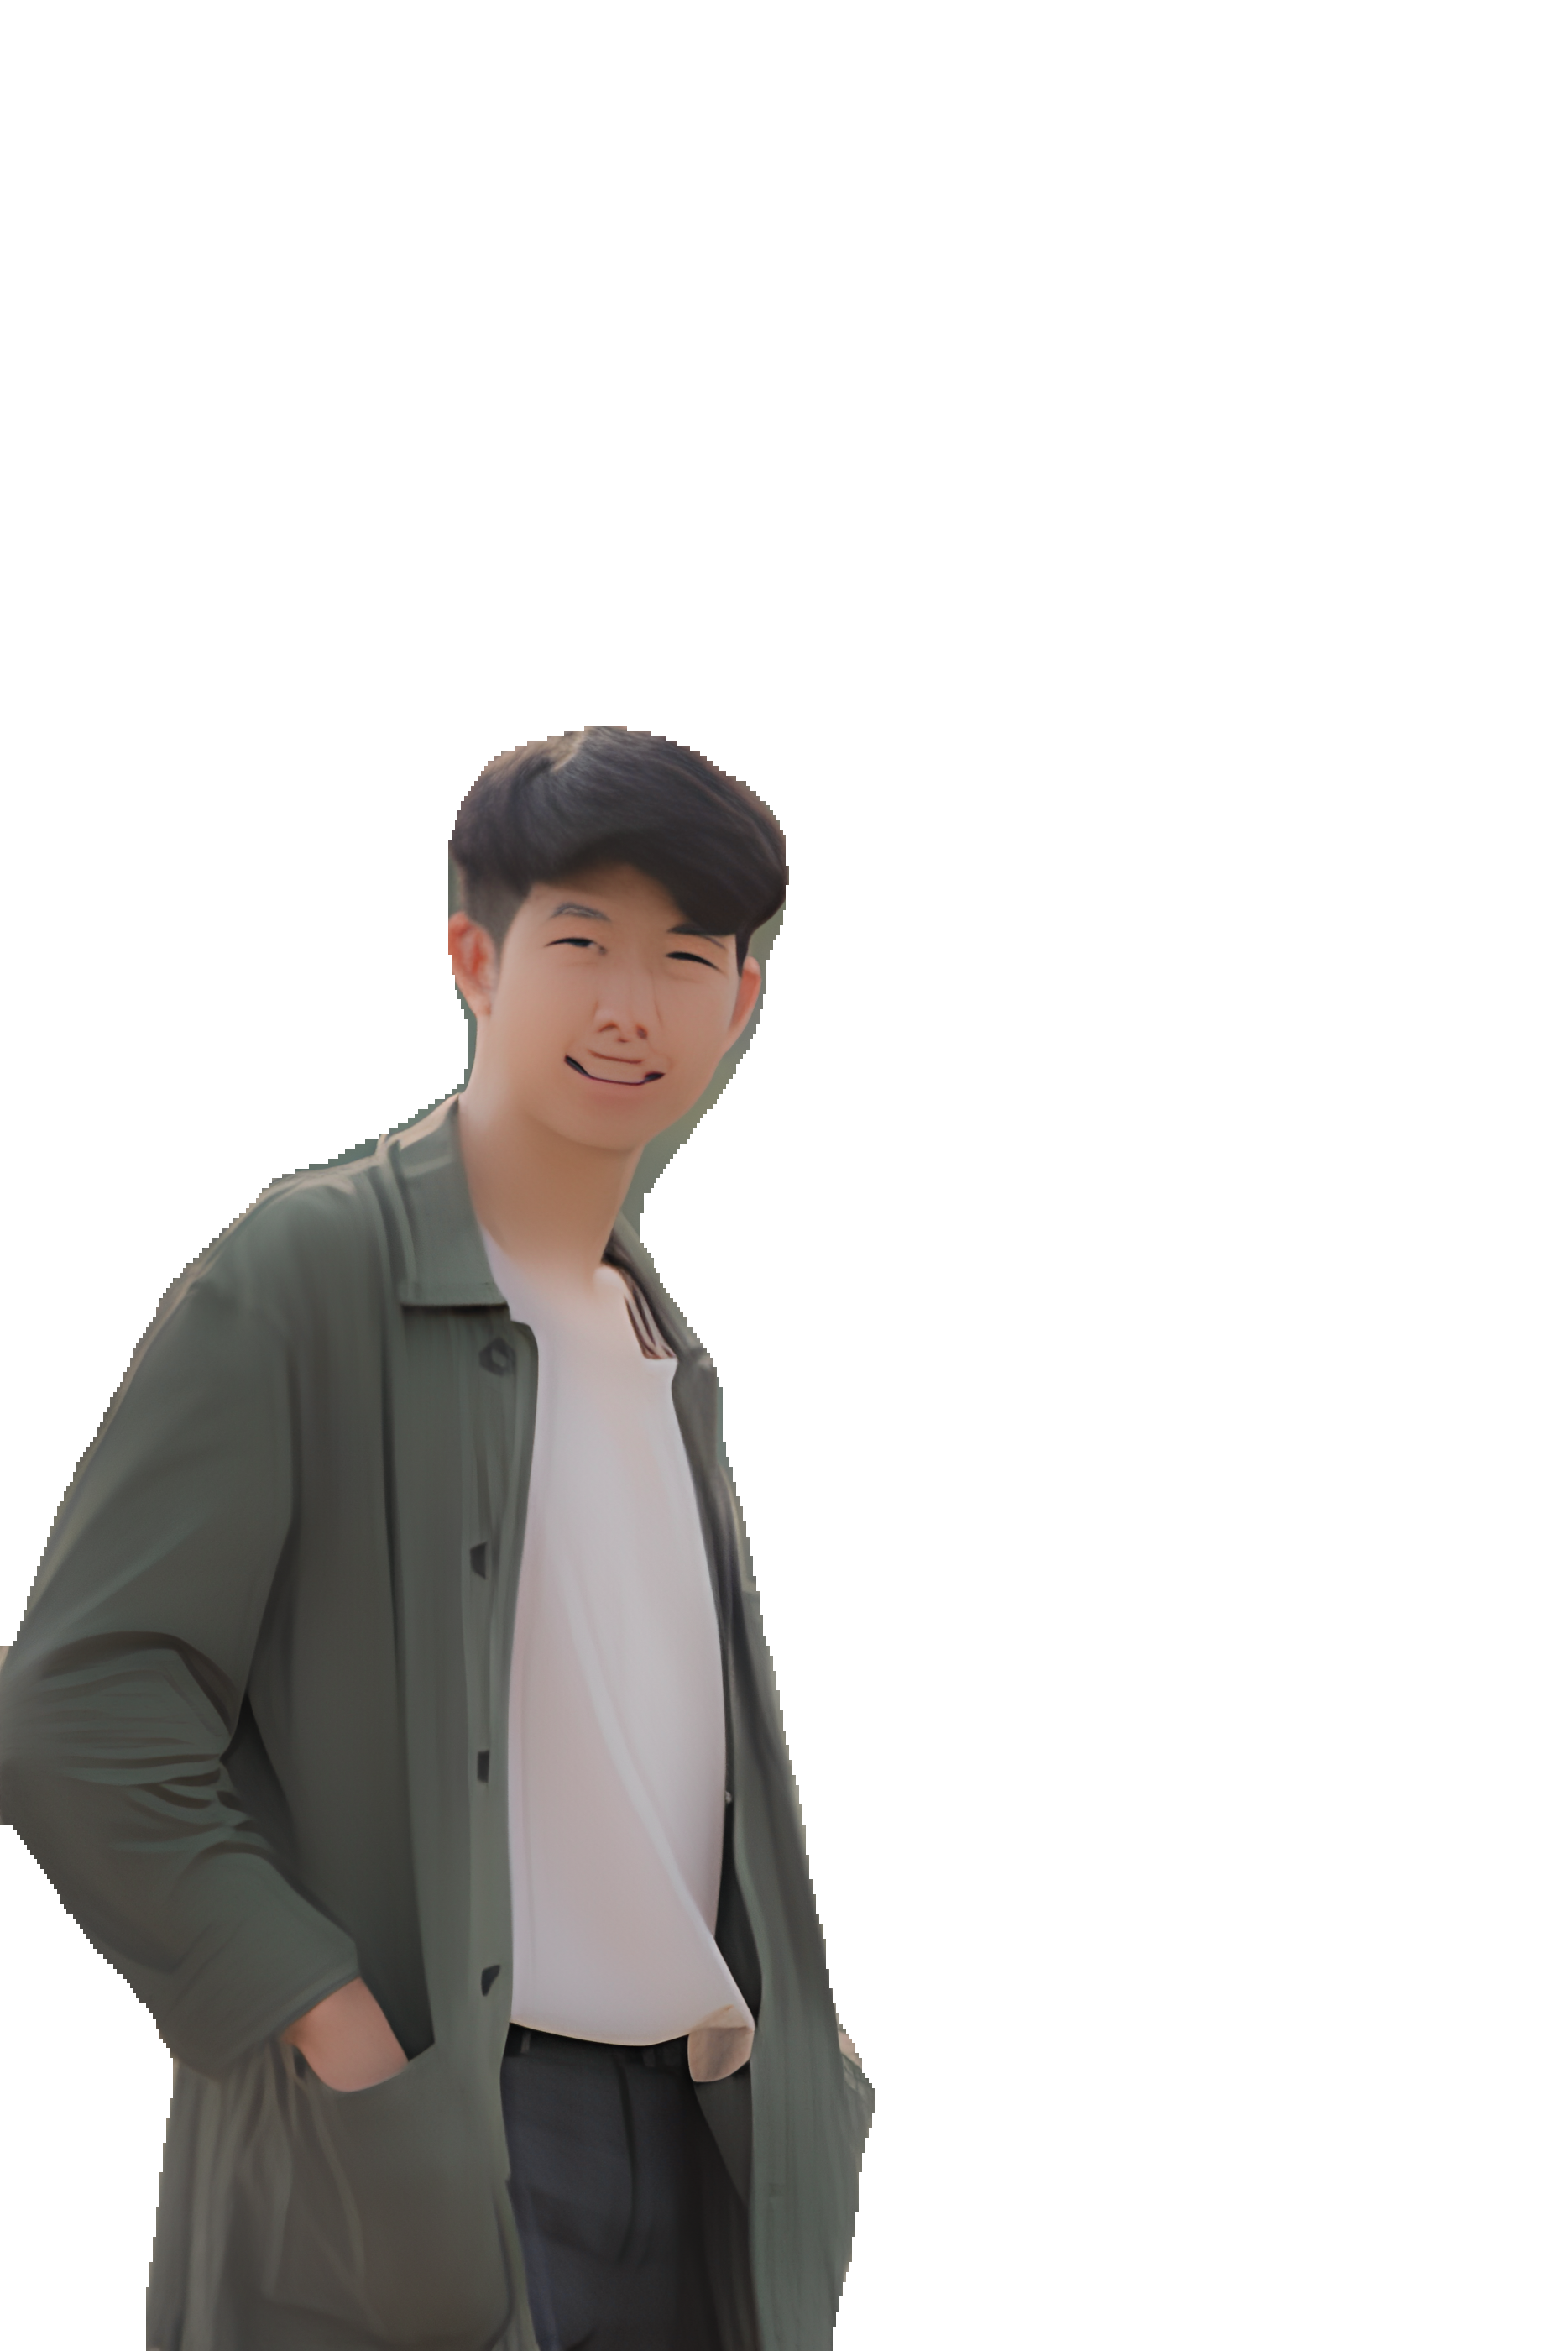

True

In [19]:
import cv2
from google.colab.patches import cv2_imshow


out_crop = cv2.imread(f'/content/Real-ESRGAN/results/SwinIR/{filenames}_SwinIR.png',1)

print(out_crop.shape)
oo = cv2.imread(f"/tmp/out_{filenames}_SwinIR2.png",1)
out_shape = cv2.resize(oo, (out_crop.shape[1],out_crop.shape[0]), interpolation=cv2.INTER_LINEAR)

transparent_img = np.zeros((out_crop.shape[0],out_crop.shape[1], 4), dtype=np.uint8)

print(transparent_img.shape)

for i in range(out_shape.shape[0]):
  for j in range(out_shape.shape[1]):
    if(out_shape[i,j,0] != 197):
      transparent_img[i,j,0] = out_crop[i,j,0]
      transparent_img[i,j,1] = out_crop[i,j,1]
      transparent_img[i,j,2] = out_crop[i,j,2]
      transparent_img[i,j,3] = 255

cv2_imshow(transparent_img)
cv2.imwrite('/tmp/dicut_img_SwinIR.png', transparent_img)

In [20]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [21]:
origin = cv2.imread(f'/content/Real-ESRGAN/{filename_origin}.png',1)
black = cv2.imread(f'/content/Real-ESRGAN/{filename_black}.png',1)
result = cv2.imread(f'/tmp/dicut_img_BSRGAN.png',1)
result1 = cv2.imread(f'/tmp/dicut_img_SwinIR.png',1)


res = PSNR(origin, cv2.resize(result, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR))
res1 = PSNR(origin, cv2.resize(result1, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR))

b1 = PSNR(black, cv2.resize(result, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR))
b2 = PSNR(black, cv2.resize(result1, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR))

a1 = PSNR(origin, black)
# a2 = PSNR(black, cv2.resize(result, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR))

print(res/a1)
print(res1/a1)
print("BSRGAN : ",b1)
print("SwinIR : ",b2)

0.9581626828648655
0.9598764637199804
BSRGAN :  34.52532791413008
SwinIR :  34.72015351280362


In [22]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Read images (of size 255 x 255) from file.
# im1 = tf.image.decode_image(tf.io.read_file(f'BSRGAN/testsets/RealSRSet/{filenames}.png'))
# im2 = tf.image.decode_image(tf.io.read_file(f'/content/Real-ESRGAN/results/BSRGAN/{filenames}_BSRGAN.png'))
# tf.shape(im1)  # `img1.png` has 3 channels; shape is `(255, 255, 3)`
# tf.shape(im2)  # `img2.png` has 3 channels; shape is `(255, 255, 3)`
# # Add an outer batch for each image.
# im1 = tf.expand_dims(im1, axis=0)
# im2 = tf.expand_dims(im2, axis=0)
# # Compute SSIM over tf.uint8 Tensors.
# ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)

# Compute SSIM over tf.float32 Tensors.
im1 = tf.image.convert_image_dtype(origin, tf.float32)
im2 = tf.image.convert_image_dtype(cv2.resize(result, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR), tf.float32)
im3 = tf.image.convert_image_dtype(black, tf.float32)
ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
bsim2 = tf.image.ssim(im3, im2, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
# ssim1 and ssim2 both have type tf.float32 and are almost equal.

im1 = tf.image.convert_image_dtype(origin, tf.float32)
im2 = tf.image.convert_image_dtype(cv2.resize(result1, (origin.shape[1],origin.shape[0]), interpolation=cv2.INTER_LINEAR), tf.float32)
ssim = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
bsim = tf.image.ssim(im3, im2, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)

asim = tf.image.ssim(im1, im3, max_val=1.0, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
# print(ssim1)
print(ssim2/asim)
print(ssim/asim)
# print(asim/ssim2)
# print(asim/ssim)
print("BSRGAN : ",bsim2)
print("SwinIR : ",bsim)

tf.Tensor(0.74683696, shape=(), dtype=float32)
tf.Tensor(0.767867, shape=(), dtype=float32)
BSRGAN :  tf.Tensor(0.9215254, shape=(), dtype=float32)
SwinIR :  tf.Tensor(0.92676204, shape=(), dtype=float32)


In [23]:
# files.download('/tmp/dicut_img_BSRGAN.png')

In [24]:
# files.download('/tmp/dicut_img_SwinIR.png')